In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest # for Kolmogorov-Smirnov test
from scipy.stats import f_oneway # for ANOVA test
from scipy.stats import chi2_contingency # for Chi-square test
import itertools # for combinations 

In [3]:
# load dataset unified
df = pd.read_csv('../data/ech_annonces_unified_68.csv',sep=';')

In [4]:
df.head(5)

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,REG,DEP,type_transaction,loyer_m2_median_n6,nb_log_n6,taux_rendement_n6,loyer_m2_median_n7,nb_log_n7,taux_rendement_n7,prix_m2_vente
0,immo-facile-52417007,pr,m,l,0,116,NaN,5,1250,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ag672097-382986683,pr,a,l,3,44,NaN,3,600,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ag672097-383464082,pr,a,l,1,53,NaN,2,498,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ag680864-383044166,pr,a,l,0,41,NaN,2,460,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ag672097-380998252,pr,a,l,2,74,NaN,4,695,NaN,...,44,68,location,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idannonce                39439 non-null  object 
 1   type_annonceur           39439 non-null  object 
 2   typedebien               39439 non-null  object 
 3   typedetransaction        39439 non-null  object 
 4   etage                    39439 non-null  int64  
 5   surface                  39439 non-null  int64  
 6   surface_terrain          11951 non-null  float64
 7   nb_pieces                39439 non-null  int64  
 8   prix_bien                39439 non-null  int64  
 9   prix_maison              437 non-null    float64
 10  prix_terrain             437 non-null    float64
 11  mensualiteFinance        39439 non-null  int64  
 12  balcon                   39439 non-null  int64  
 13  eau                      39439 non-null  int64  
 14  bain                  

In [6]:
df.shape

(39439, 60)

In [7]:
# Percentage of missing values per column
df.isna().mean()*100

idannonce                   0.000000
type_annonceur              0.000000
typedebien                  0.000000
typedetransaction           0.000000
etage                       0.000000
surface                     0.000000
surface_terrain            69.697508
nb_pieces                   0.000000
prix_bien                   0.000000
prix_maison                98.891960
prix_terrain               98.891960
mensualiteFinance           0.000000
balcon                      0.000000
eau                         0.000000
bain                        0.000000
dpeL                        0.000000
dpeC                       34.113441
mapCoordonneesLatitude      0.000000
mapCoordonneesLongitude     0.000000
annonce_exclusive           0.000000
nb_etages                  45.510789
parking                    99.931540
places_parking             63.865717
cave                       53.741221
exposition                  0.000000
ges_class                  26.113745
annee_construction         70.250260
n

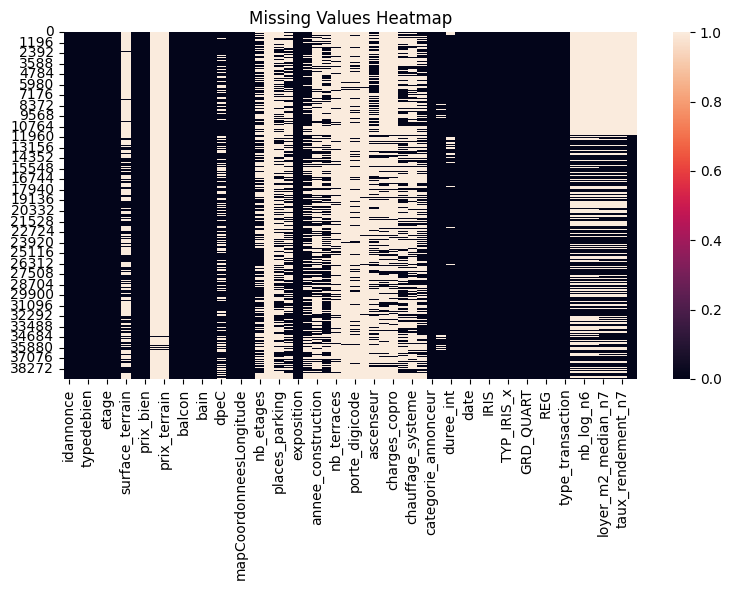

In [8]:
# Visualize missing values heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [9]:
# Columns with more than 40% missing values
df.loc[:,df.isna().mean()*100 > 40].columns

Index(['surface_terrain', 'prix_maison', 'prix_terrain', 'nb_etages',
       'parking', 'places_parking', 'cave', 'annee_construction',
       'nb_toilettes', 'nb_terraces', 'videophone', 'porte_digicode',
       'surface_balcon', 'ascenseur', 'nb_logements_copro', 'charges_copro',
       'chauffage_energie', 'chauffage_systeme', 'chauffage_mode',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'],
      dtype='object')

In [10]:
# Display the sum of duplicated 
df.duplicated().sum()

0

In [11]:
# Select numerical variables
var_num = df.select_dtypes(include=['int', 'float'])
# Select categorical variables
var_cat = df.select_dtypes(include=['object','category'])

In [12]:
# Display the columns of numerical and categorical variables
display(var_num.columns)
display(var_cat.columns)

# Count of numerical and categorical variables
count_data_train = var_num + var_cat
display(count_data_train.shape)

Index(['etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeC', 'mapCoordonneesLatitude', 'mapCoordonneesLongitude',
       'nb_etages', 'places_parking', 'annee_construction', 'nb_toilettes',
       'nb_terraces', 'surface_balcon', 'nb_logements_copro', 'charges_copro',
       'duree_int', 'INSEE_COM', 'IRIS', 'CODE_IRIS', 'GRD_QUART', 'UU2010',
       'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7',
       'prix_m2_vente'],
      dtype='object')

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'dpeL', 'annonce_exclusive', 'parking', 'cave', 'exposition',
       'ges_class', 'videophone', 'porte_digicode', 'ascenseur',
       'chauffage_energie', 'chauffage_systeme', 'chauffage_mode',
       'categorie_annonceur', 'logement_neuf', 'typedebien_lite', 'date',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'type_transaction'],
      dtype='object')

(39439, 60)

In [13]:
# Display descriptive statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
display(var_num.describe().T)
# Display descriptive statistics for categorical variables
print("Descriptive Statistics for Categorical Variables:")
display(var_cat.describe().T)

Descriptive Statistics for Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
etage,39439.0,1.525165e+00,2.618538e+01,-2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.990000e+02
surface,39439.0,9.552730e+01,5.722246e+01,2.000000e+00,6.100000e+01,8.400000e+01,1.150000e+02,9.800000e+02
surface_terrain,11951.0,9.981830e+02,6.553261e+03,1.000000e+00,3.680000e+02,5.840000e+02,8.650000e+02,4.316000e+05
nb_pieces,39439.0,4.020208e+00,1.986394e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,4.300000e+01
prix_bien,39439.0,1.952640e+05,2.008355e+05,1.000000e+00,9.200000e+02,1.700000e+05,2.964500e+05,3.380000e+06
prix_maison,437.0,2.131345e+05,7.143752e+04,8.600000e+04,1.565000e+05,1.996200e+05,2.500100e+05,5.149990e+05
prix_terrain,437.0,8.975758e+04,4.763330e+04,1.000000e+00,6.200000e+04,8.700000e+04,1.158000e+05,3.200000e+05
mensualiteFinance,39439.0,9.306220e+00,1.167912e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.715000e+03
balcon,39439.0,1.733563e-01,4.293413e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
eau,39439.0,2.846928e-01,5.200837e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01


Descriptive Statistics for Categorical Variables:


,count,unique,top,freq
idannonce,39439,39439,immo-facile-52417007,1
type_annonceur,39439,2,pr,39332
typedebien,39439,5,a,23835
typedetransaction,39439,5,v,27369
dpeL,39439,10,D,8905
annonce_exclusive,39439,3,0,15993
parking,27,2,True,21
cave,18244,2,True,11536
exposition,39439,36,0,32100
ges_class,29140,9,D,5901


In [14]:
# features to drop 
#features_to_drop = ['id','date_creation','date_modification','date_parution','geo_point_2d','geo_shape','latitude','longitude']

In [15]:
# Count unique values in numerical variables
display(var_num.nunique())
# Count unique values in categorical variables
display(var_cat.nunique())

etage                         29
surface                      403
surface_terrain             2136
nb_pieces                     22
prix_bien                   5957
prix_maison                  313
prix_terrain                 211
mensualiteFinance            325
balcon                        10
eau                           11
bain                          13
dpeC                        1220
mapCoordonneesLatitude     18616
mapCoordonneesLongitude    18464
nb_etages                     33
places_parking                27
annee_construction           258
nb_toilettes                  16
nb_terraces                    9
surface_balcon                46
nb_logements_copro           318
charges_copro               2174
duree_int                    522
INSEE_COM                    382
IRIS                          66
CODE_IRIS                    520
GRD_QUART                    382
UU2010                        44
REG                            6
DEP                            6
loyer_m2_m

idannonce              39439
type_annonceur             2
typedebien                 5
typedetransaction          5
dpeL                      10
annonce_exclusive          3
parking                    2
cave                       2
exposition                36
ges_class                  9
videophone                 2
porte_digicode             2
ascenseur                  2
chauffage_energie         10
chauffage_systeme         13
chauffage_mode             6
categorie_annonceur        6
logement_neuf              2
typedebien_lite            3
date                      51
TYP_IRIS_x                 4
TYP_IRIS_y                 3
type_transaction           2
dtype: int64

### Analyse Univariée

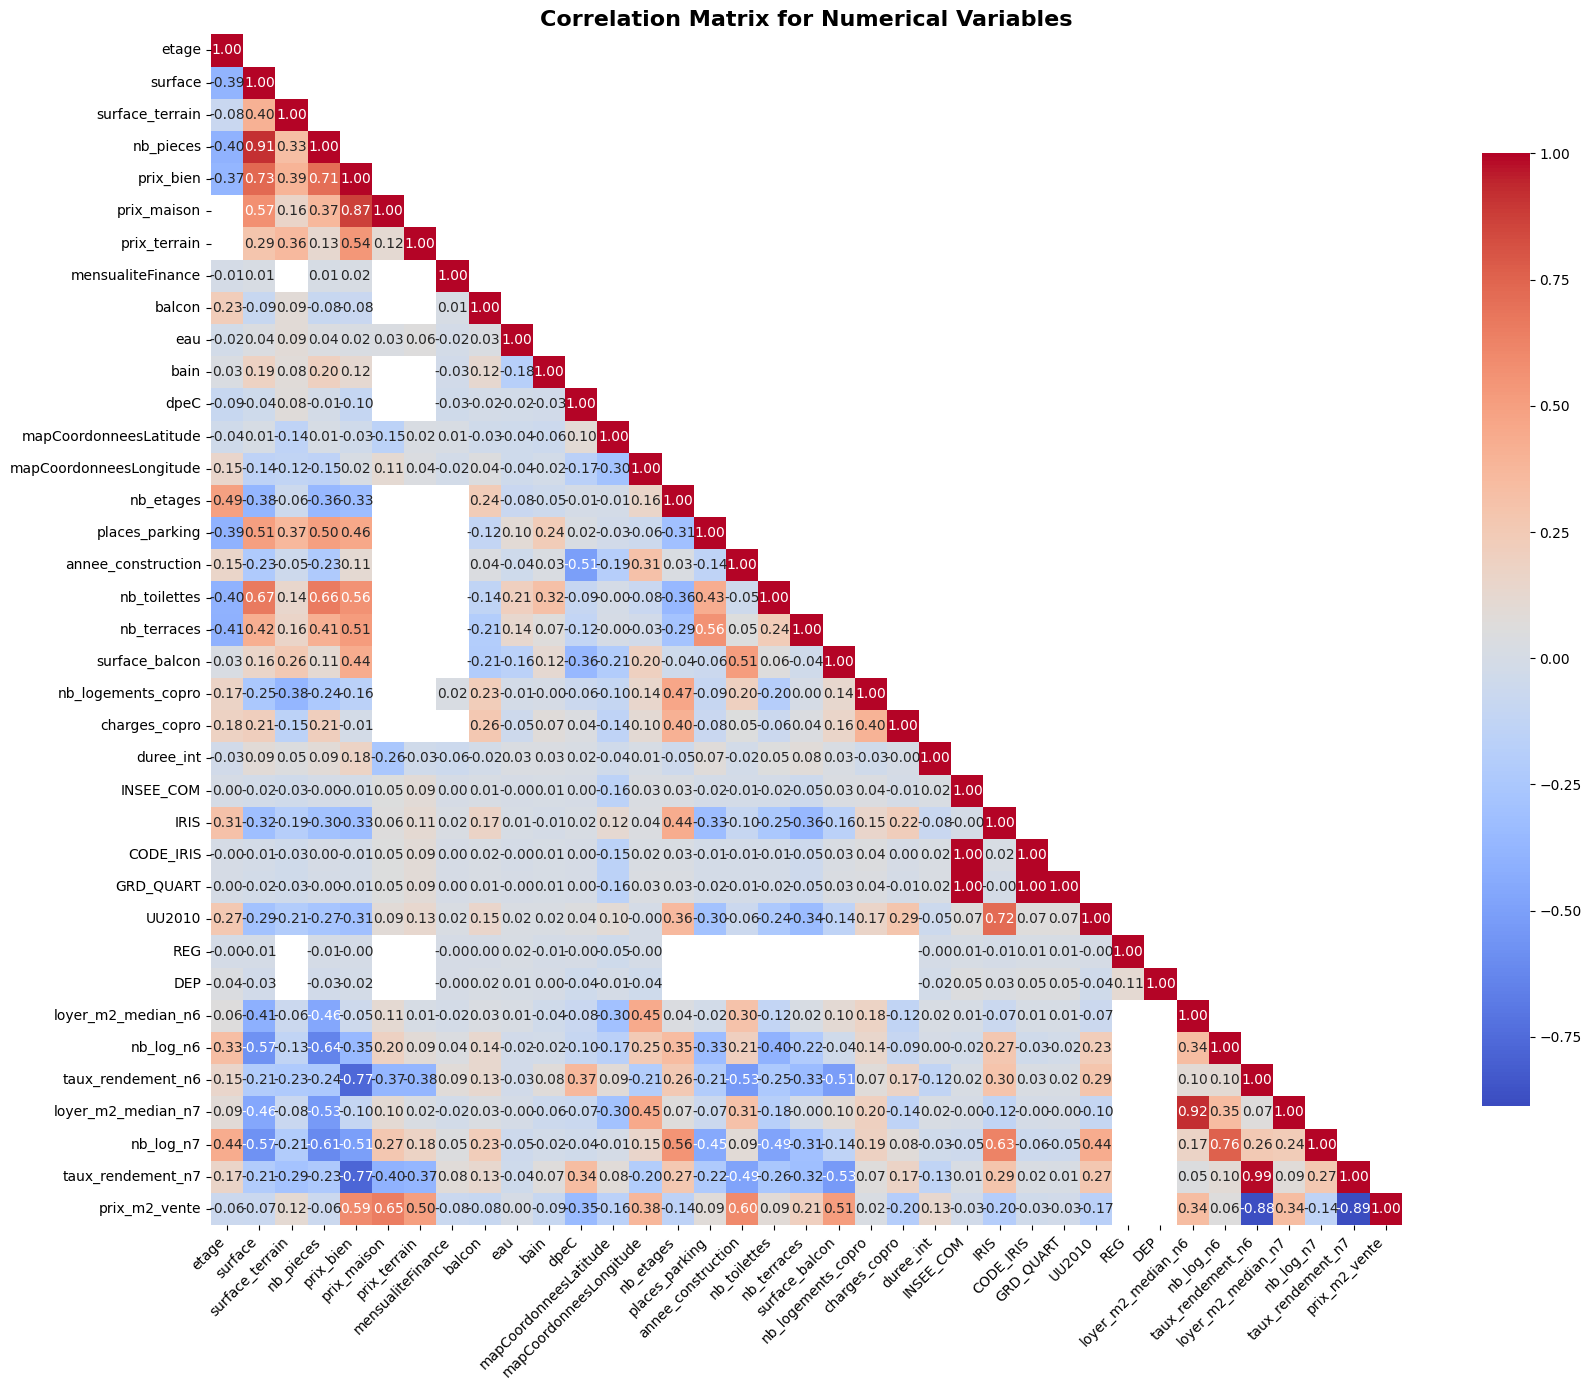

In [ ]:
# Correlation matrix for numerical variables using Spearman method 

plt.figure(figsize=(18, 14))
corr = var_num.corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # Masquer le triangle supérieur
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, mask=mask, 
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Mtrix faor Numerical Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### insghit 

In [17]:
var_num.shape

(39439, 37)

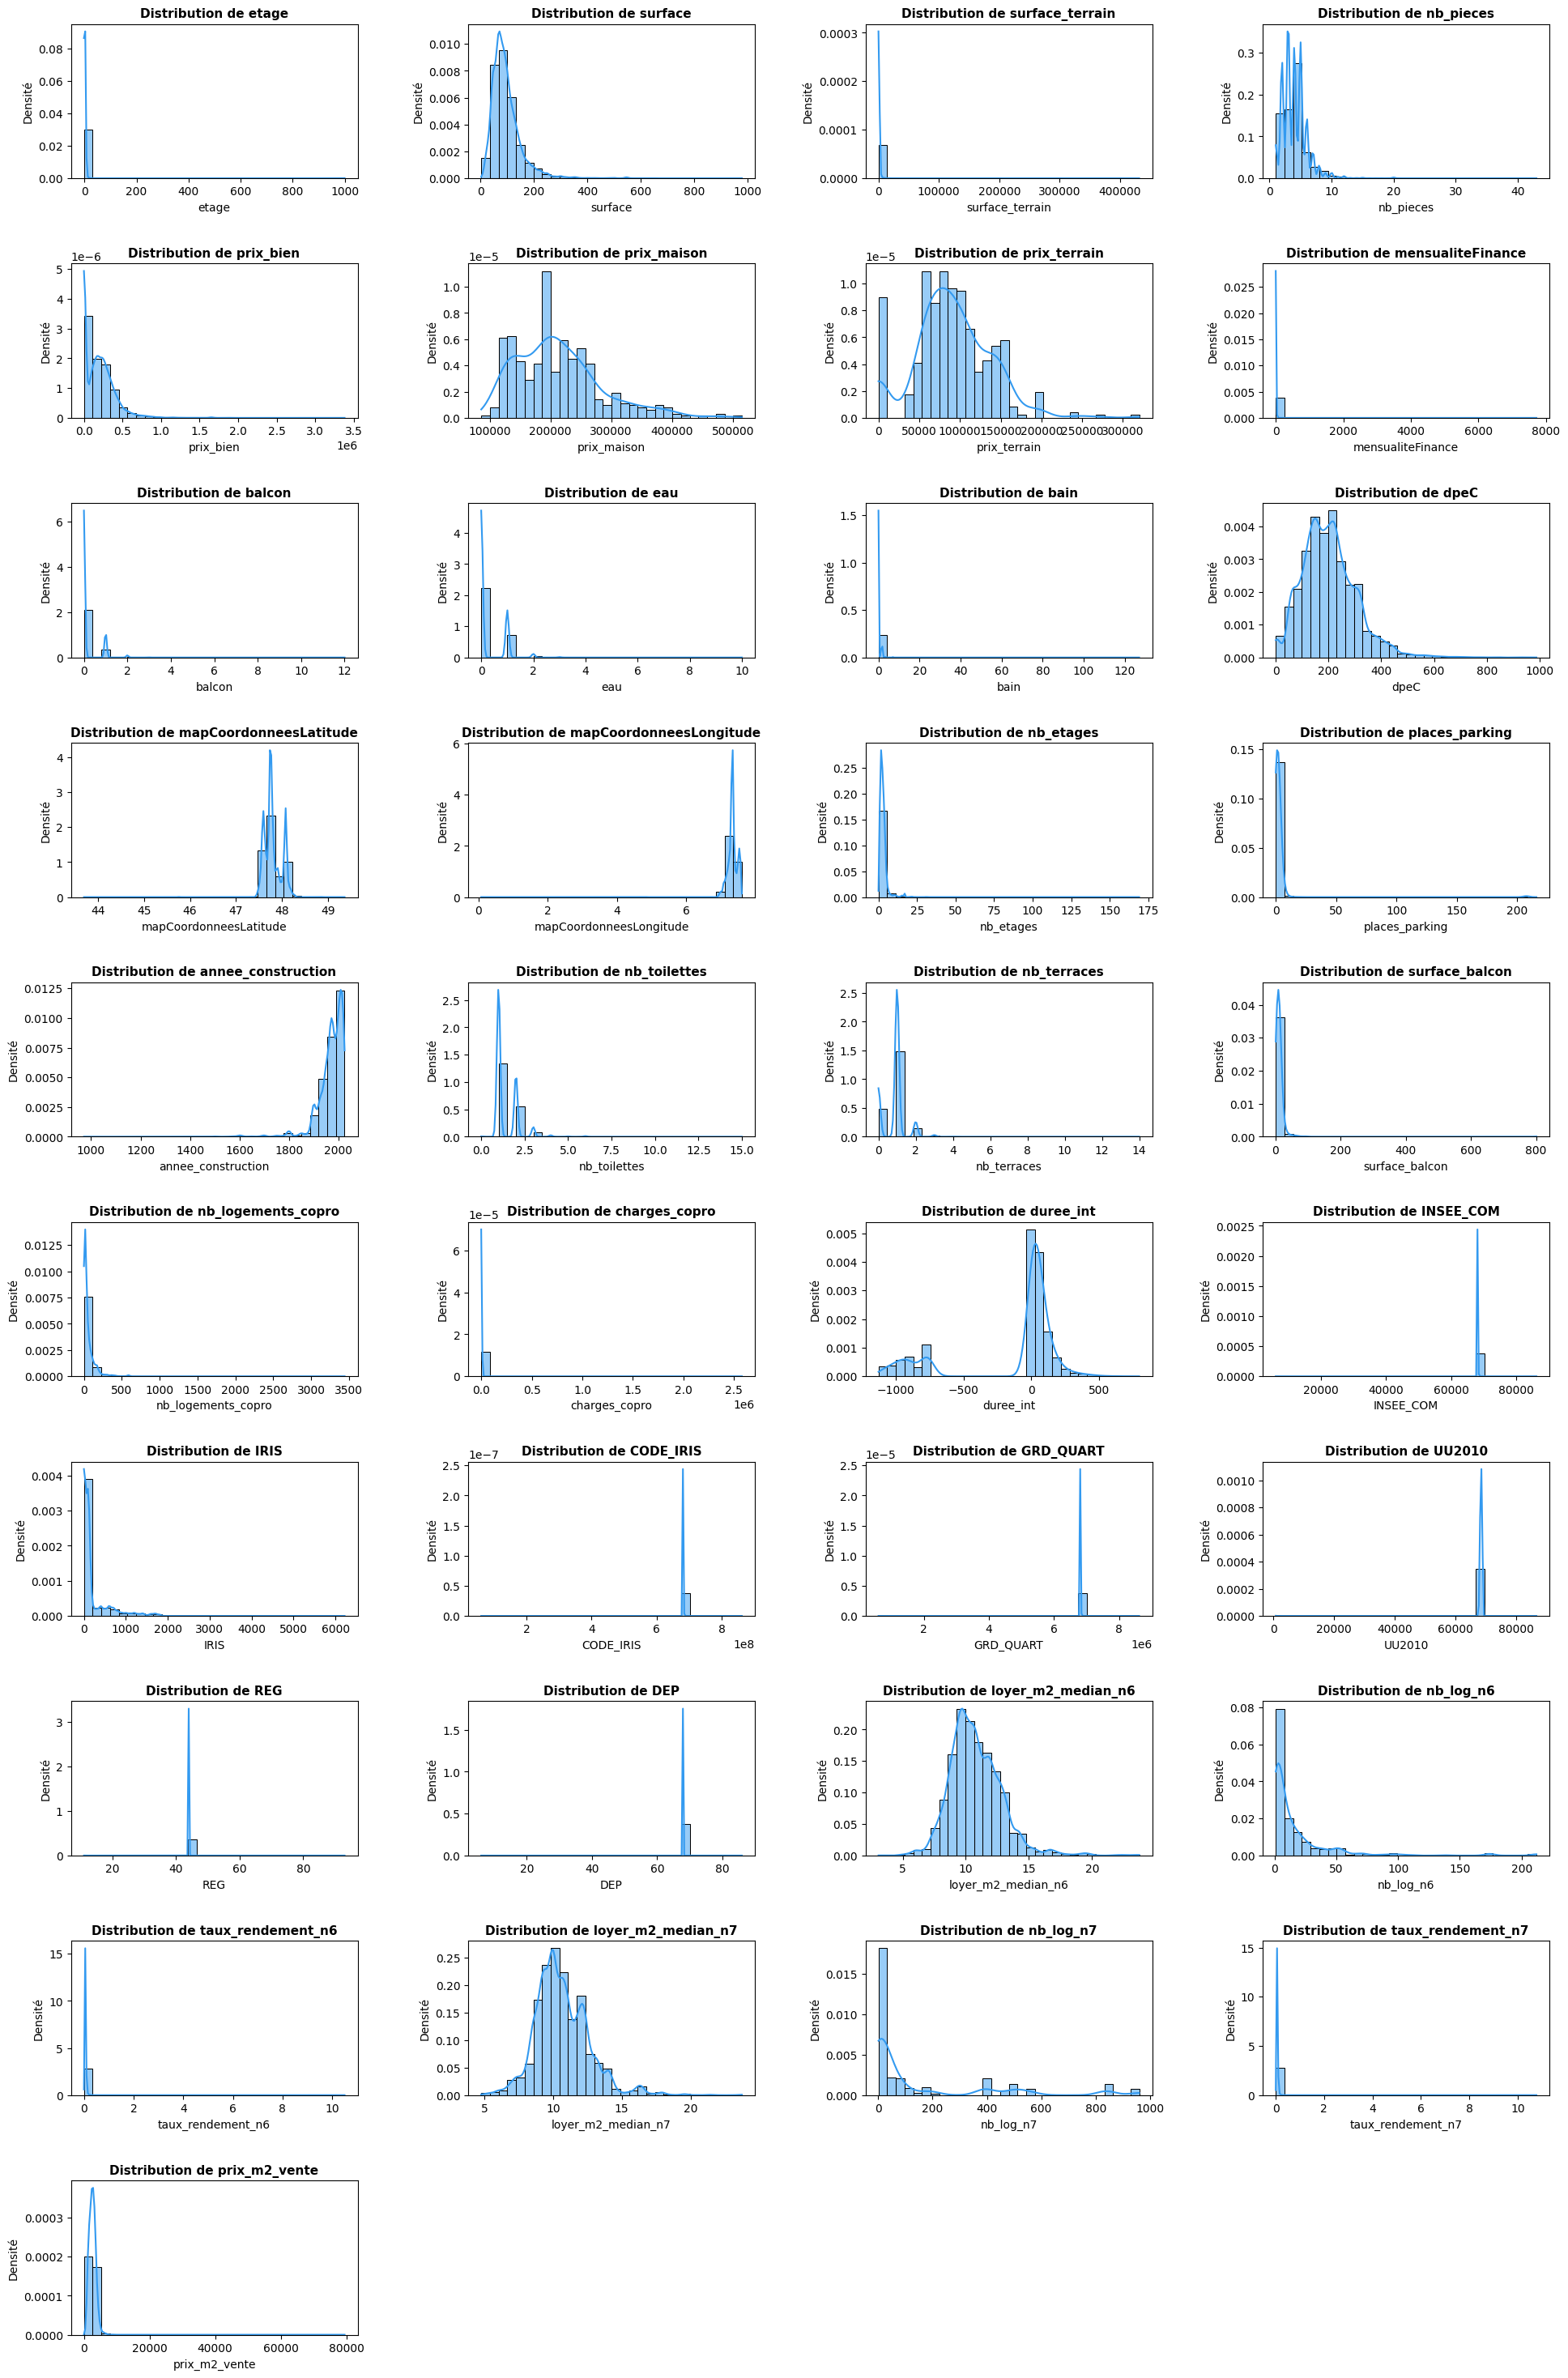

In [25]:
# Display distribution of numerical variables

n_cols = len(var_num.columns)
n_rows = (n_cols + 3) // 4  # 4 colonnes par ligne
fig_height = max(12, n_rows * 3)  # Hauteur adaptée au nombre de lignes

plt.figure(figsize=(20, fig_height))
for i, column in enumerate(var_num.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(var_num[column], kde=True, bins=30, color='#339af0', stat='density')
    plt.title(f'Distribution de {column}', fontsize=11, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Densité', fontsize=10)

plt.tight_layout(pad=3)
plt.show()

In [19]:
results = []

for col in var_num.columns:
    data = df[col].dropna()

    # Normalization 
    data_norm = (data - data.mean()) / data.std()

    # KS test vs normal distribution
    ks_stat, p_value = kstest(data_norm, 'norm')

    # Conclusion on normality
    is_normal = "Yes" if p_value >= 0.05 else "No"

    results.append([col, ks_stat, p_value, is_normal])

# Final results DataFrame
ks_df = pd.DataFrame(results, columns=["Variable", "KS_statistic", "p_value", "Is_Normal"])
ks_df

,Variable,KS_statistic,p_value,Is_Normal
0,etage,0.476396,0.000000e+00,No
1,surface,0.126679,0.000000e+00,No
2,surface_terrain,0.439528,0.000000e+00,No
3,nb_pieces,0.142797,0.000000e+00,No
4,prix_bien,0.165590,0.000000e+00,No
5,prix_maison,0.092435,1.063000e-03,No
6,prix_terrain,0.080564,6.481642e-03,No
7,mensualiteFinance,0.521131,0.000000e+00,No
8,balcon,0.498616,0.000000e+00,No
9,eau,0.448458,0.000000e+00,No


In [ ]:
# VIF Calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = var_num.columns
vif_data["VIF"] = [variance_inflation_factor(var_num.values, i) for i in range(len(var_num.columns))]

# Sort by VIF descending for better visibility
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

# Display with formatting
print("Variance Inflation Factor (VIF) Analysis")
print("=" * 60)
display(vif_data)

# Highlight high VIF values (VIF > 10 indicates multicollinearity)
print("\nVariables with high VIF (>10) - Potential Multicollinearity:")
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    display(high_vif)
else:
    print("✓ No variables with VIF > 10")

ValueError: Length of values (37) does not match length of index (39439)